 ### Forecasting - Example </b>

Here below, a brief illustrative example of the forecasting process for a station using the time series forecasting solution Facebook Prophet. The csv data counted_demand and counted_supply were generated following the instructions from the notes 'forecasting_processing'. The following examples were based on the offical guide [Prophet Python Reference](https://facebook.github.io/prophet/docs/quick_start.html#r-api)

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import fbprophet 
%matplotlib inline

<b> 1. Importing the datasets with daily demand and supply per hour </b>

In [4]:
#importing the counted demand and supply for each station and hour Jan 2020 to November 2020 

#data path declaration
path_demand = r'counted_demand.csv'
path_supply = r'counted_supply.csv'

#importing the csv followind the path
counted_demand  = pd.read_csv(path_demand)
counted_supply = pd.read_csv(path_supply)

<b> 2. Fitting and forecasting </b>

In [14]:
#a station name has been passed to filter the data
forc_station = 'St Andrews House'

#filtering the demand station by the name station given 
forc_station_dem = counted_demand[(counted_demand.start_station_name == forc_station)]
forc_station_dem = counted_demand.drop(['start_station_name'], axis=1).rename( columns={"count_demand": "y"})

#filtering the supply station by the name station given 
forc_station_sup = counted_supply[(counted_supply.end_station_name == forc_station)]
forc_station_sup = counted_supply.drop(['end_station_name'], axis=1).rename( columns={"count_supply": "y"})

<b> 2.1 - Forecasting Demand </b>

In [20]:
#fitting the modle using the data on the previous demand

dem_model = fbprophet.Prophet(yearly_seasonality = True, weekly_seasonality=True).fit(forc_station_dem) 

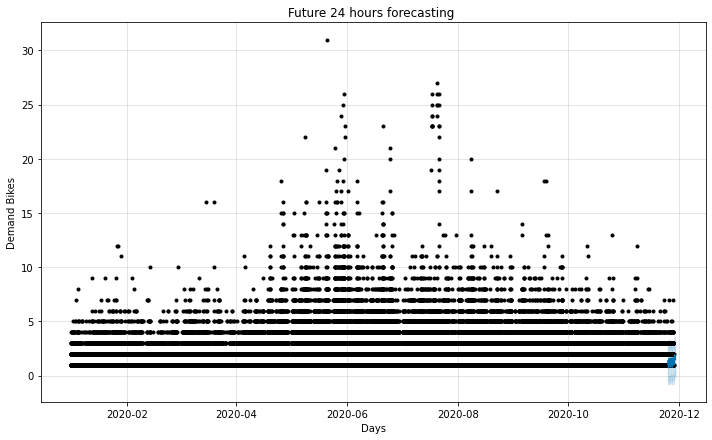

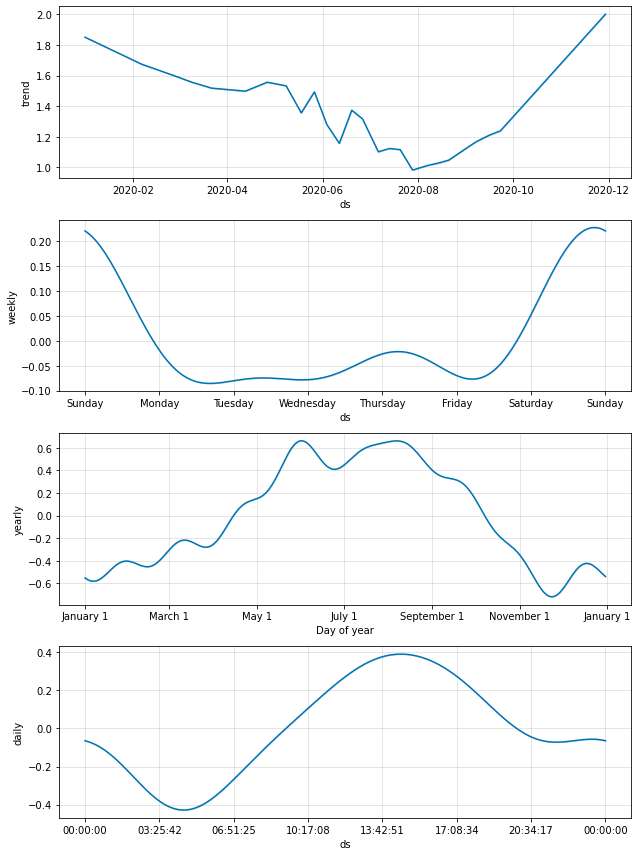

In [33]:
#forecasting demnd for 24 hours and plotting the output
future_dem = dem_model.make_future_dataframe(periods=24, freq='H')
fcst_dem = dem_model.predict(future_dem)


dem_model.plot(fcst_dem[-100:])
plt.title('Future 24 hours forecasting ')
plt.ylabel('Demand Bikes')
plt.xlabel('Days')

#specific demand seasonalities
dem_model.plot_components(fcst_dem);

The initial figure can be unclear, however visualising each component of the model, it is possible to understand the forecasting outputs for different seasonalities and time frames. Additionally the numerical forecasts outputs are included.


In [41]:
#the actual forecast is yhat, which indicated the number of  bikes expected in demand for the specified hour
print(fcst_dem[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24).round(0)) 

                      ds  yhat  yhat_lower  yhat_upper
7328 2020-11-28 00:00:00   1.0        -0.0         3.0
7329 2020-11-28 01:00:00   1.0        -0.0         3.0
7330 2020-11-28 02:00:00   1.0        -0.0         3.0
7331 2020-11-28 03:00:00   1.0        -1.0         3.0
7332 2020-11-28 04:00:00   1.0        -1.0         3.0
7333 2020-11-28 05:00:00   1.0        -1.0         3.0
7334 2020-11-28 06:00:00   1.0        -1.0         3.0
7335 2020-11-28 07:00:00   1.0        -0.0         3.0
7336 2020-11-28 08:00:00   1.0        -0.0         3.0
7337 2020-11-28 09:00:00   1.0        -0.0         3.0
7338 2020-11-28 10:00:00   2.0        -0.0         3.0
7339 2020-11-28 11:00:00   2.0         0.0         3.0
7340 2020-11-28 12:00:00   2.0         0.0         3.0
7341 2020-11-28 13:00:00   2.0         0.0         3.0
7342 2020-11-28 14:00:00   2.0         0.0         4.0
7343 2020-11-28 15:00:00   2.0         0.0         4.0
7344 2020-11-28 16:00:00   2.0         0.0         3.0
7345 2020-

The table above summerises the forecasted bikes (yhat) for the following 24 hours from the end of the data set, which is the 27th of November 2020

<b> 2.2 - Forecasting Supply </b> 

In [35]:
#fitting the modle using the data on the previous demand
sup_model = fbprophet.Prophet(yearly_seasonality = True, weekly_seasonality = True).fit(forc_station_sup) 

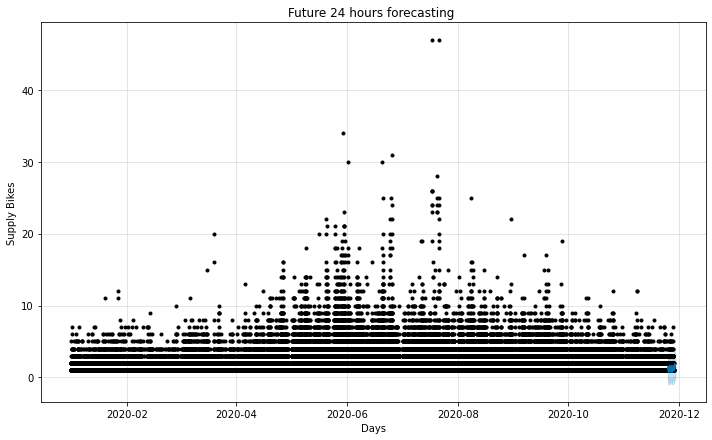

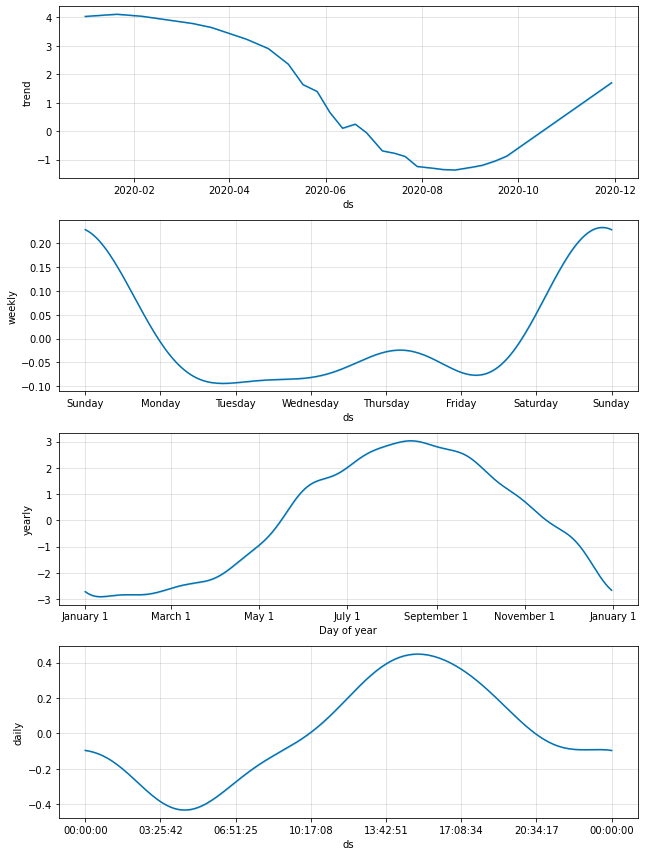

In [37]:
#forecasting supply for 24 hours and plotting the output
future_sup = sup_model.make_future_dataframe(periods=24, freq='H')
fcst_sup = sup_model.predict(future_sup)


sup_model.plot(fcst_sup[-100:])
plt.title('Future 24 hours forecasting ')
plt.ylabel('Supply Bikes')
plt.xlabel('Days')

#specific supply seasonalities
sup_model.plot_components(fcst_sup);

In [40]:
#the actual forecast is yhat, which indicated the number of  bikes expected in supply/used by the cyclists 
print(fcst_sup[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24).round(0)) 

                      ds  yhat  yhat_lower  yhat_upper
7370 2020-11-28 00:00:00   1.0        -0.0         3.0
7371 2020-11-28 01:00:00   1.0        -1.0         3.0
7372 2020-11-28 02:00:00   1.0        -0.0         3.0
7373 2020-11-28 03:00:00   1.0        -1.0         3.0
7374 2020-11-28 04:00:00   1.0        -1.0         2.0
7375 2020-11-28 05:00:00   1.0        -1.0         3.0
7376 2020-11-28 06:00:00   1.0        -1.0         3.0
7377 2020-11-28 07:00:00   1.0        -1.0         3.0
7378 2020-11-28 08:00:00   1.0        -1.0         3.0
7379 2020-11-28 09:00:00   1.0        -1.0         3.0
7380 2020-11-28 10:00:00   1.0        -0.0         3.0
7381 2020-11-28 11:00:00   1.0        -0.0         3.0
7382 2020-11-28 12:00:00   2.0        -0.0         3.0
7383 2020-11-28 13:00:00   2.0         0.0         3.0
7384 2020-11-28 14:00:00   2.0         0.0         3.0
7385 2020-11-28 15:00:00   2.0         0.0         4.0
7386 2020-11-28 16:00:00   2.0         0.0         4.0
7387 2020-

<b> 4. Net Flow </b>

The net flow is seen as the difference between the demanded bikes (outflow) and the incoming bikes from he users (inflow).
Here a visual example of the net flow forecats for the St Andrews House bike station. The differential flow data inflow-outflow is found in the dataset st_andrews_house.csv

In [45]:
#loading the net flow dataset
path_flow = r'st_andrews_house.csv'
net_flow = pd.read_csv(path_flow)

#preparing the model inputs 
net_flow = net_flow.drop(['weekday','arrival', 'departure'], axis=1).rename( columns={"date":"ds", "flow": "y"})

net_flow.head(3)

,ds,y
0,2019-11-01 00:00:00,0
1,2019-11-01 01:00:00,0
2,2019-11-01 02:00:00,0


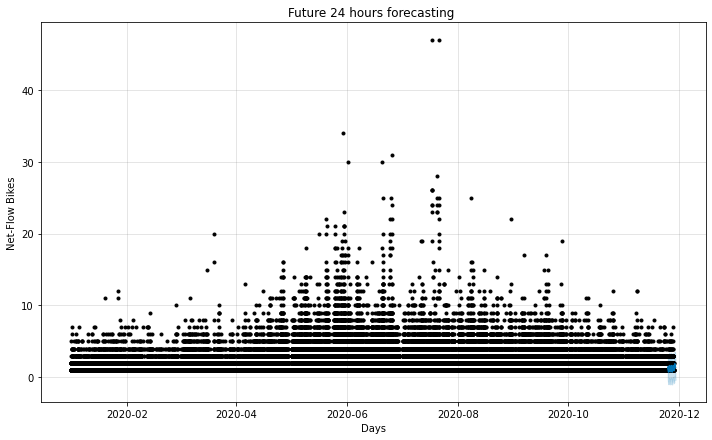

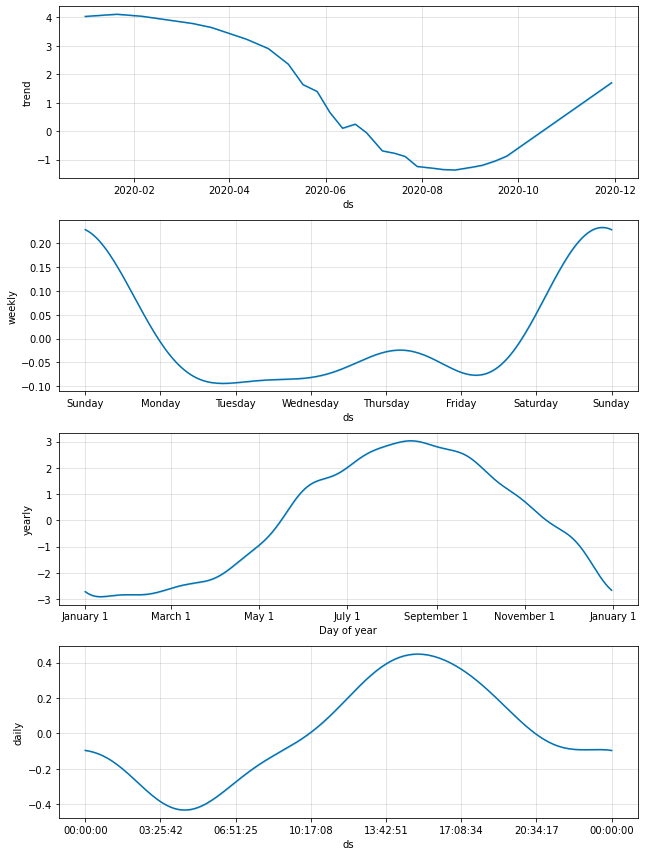

In [47]:
#fitting the model 
flow_model = fbprophet.Prophet(yearly_seasonality = True, weekly_seasonality = True).fit(forc_station_sup) 

future_flow = sup_model.make_future_dataframe(periods=24, freq='H')
fcst_flow = sup_model.predict(future_flow)


flow_model.plot(fcst_flow[-100:])
plt.title('Future 24 hours forecasting ')
plt.ylabel('Net-Flow Bikes')
plt.xlabel('Days')

#specific supply seasonalities
flow_model.plot_components(fcst_flow);

In [48]:
#the actual forecast is yhat, which indicated the number of  bikes expected in supply/used by the cyclists 
print(fcst_flow[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24).round(0)) 

                      ds  yhat  yhat_lower  yhat_upper
7370 2020-11-28 00:00:00   1.0        -1.0         3.0
7371 2020-11-28 01:00:00   1.0        -1.0         3.0
7372 2020-11-28 02:00:00   1.0        -1.0         3.0
7373 2020-11-28 03:00:00   1.0        -1.0         3.0
7374 2020-11-28 04:00:00   1.0        -1.0         2.0
7375 2020-11-28 05:00:00   1.0        -1.0         3.0
7376 2020-11-28 06:00:00   1.0        -1.0         3.0
7377 2020-11-28 07:00:00   1.0        -1.0         3.0
7378 2020-11-28 08:00:00   1.0        -1.0         3.0
7379 2020-11-28 09:00:00   1.0        -1.0         3.0
7380 2020-11-28 10:00:00   1.0        -0.0         3.0
7381 2020-11-28 11:00:00   1.0        -0.0         3.0
7382 2020-11-28 12:00:00   2.0        -0.0         3.0
7383 2020-11-28 13:00:00   2.0        -0.0         4.0
7384 2020-11-28 14:00:00   2.0         0.0         3.0
7385 2020-11-28 15:00:00   2.0         0.0         3.0
7386 2020-11-28 16:00:00   2.0         0.0         4.0
7387 2020-

The net flow output (yhat), reppresents the expected surpluses/shortages of bikes expected from the difference of deman and supply of bikes. As showed above, the simplified example is refered for a single station. On the other hand, the optimization model, takes into consideration the net-flow of all the bike staions in the network and similarly, the forecasts of hourly net-flow for each station for the follwoing 24 hours from the time the forecast is made.